In [3]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat


%matplotlib inline

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=1.5)

In [36]:
def greek_text_to_symbol(text):
    greek_text_to_symbol_dict={
        "alpha1": 'α1',
        "alpha2": 'α2',
        "alpha3": 'α3',
        "alpha'1": "α'1",
        "alpha'2": "α'2", 
        "alpha'3": "α'3",
        "beta1": 'β1',
        "beta2": 'β2',
        "beta'1": "β'1",
        "beta'2": "β'2",
        "gamma1": 'γ1',
        "gamma2": 'γ2',
        "gamma3": 'γ3',
        "gamma4": 'γ4',
        "gamma5": 'γ5'
    }
    return greek_text_to_symbol_dict[text]

def greek_symbol_to_text(symbol):
    greek_symbol_to_text_dict={
        'α1': "alpha1",
        'α2': "alpha2",
        'α3': "alpha3",
        "α'1": "alpha'1",
        "α'2": "alpha'2", 
        "α'3": "alpha'3",
        'β1': "beta1",
        'β2': "beta2",
        "β'1":"beta'1",
        "β'2": "beta'2",
        'γ1': "gamma1",
        'γ2': "gamma2",
        'γ3': "gamma3",
        'γ4': "gamma4",
        'γ5': "gamma5"
    }
    return greek_symbol_to_text_dict[symbol]

## Import Data


### 1. Import Siju Data

In [9]:
DATA_DIR = Path('../data')

../data/siju-dataframe.pkl


In [11]:
df = pd.read_pickle(DATA_DIR / 'siju-dataframe.pkl')
print(f'Dataframe shape: {df.shape}')

Dataframe shape: (5910, 22)


Clean the data

In [23]:
# Remove high vinegar stimulus
df = df[df["stimulus"] != "high_Vinegar"]

# Select relevent data
df_siju = df[['stimulus', 'valence', 'greek_lobe', 'ΔF/F']]
df_siju.head()

df_siju = df_minimal.groupby(['stimulus', 'greek_lobe']).mean()
df_siju.reset_index(inplace=True)
df_siju.head()

,stimulus,greek_lobe,ΔF/F
0,1-Hexanol,α'1,0.522537
1,1-Hexanol,α'2,0.245707
2,1-Hexanol,α'3,0.706134
3,1-Hexanol,α1,0.280743
4,1-Hexanol,α2,0.275617


In [24]:
# Create the pivot table
df_siju = df_siju.pivot(index='greek_lobe', columns='stimulus', values='ΔF/F')
df_siju

stimulus,1-Hexanol,2-Heptanone,3Octanol,4MCH,Citronella,Ethanol,Geosmin,Isoamylacetate,Peppermint,Vinegar,Yeast,cVA
greek_lobe,,,,,,,,,,,,
α'1,0.522537,0.566499,0.744930,0.404428,0.481624,0.276859,0.187068,0.554840,0.722583,0.246394,0.341463,0.586559
α'2,0.245707,0.374212,0.627846,0.235425,0.367692,0.255270,0.209110,0.458982,0.447005,0.230822,0.342419,0.458172
α'3,0.706134,0.581740,0.643226,0.436457,0.904901,1.117133,0.524501,0.814331,0.965673,0.818344,1.015078,0.860125
α1,0.280743,0.142432,0.346082,0.316079,0.141556,0.208673,0.074219,0.233291,0.165674,0.088059,0.116289,0.118710
α2,0.275617,0.360841,0.661575,0.225136,0.365226,0.319671,0.212317,0.508727,0.421672,0.235337,0.323195,0.478627
α3,0.368824,0.468953,0.842880,0.404874,0.431450,0.357895,0.162553,0.623453,0.561267,0.172045,0.301197,0.424641
β'1,1.246798,0.902461,1.272172,1.301942,0.841846,1.301551,0.943467,1.380607,1.524851,0.919013,1.051012,1.106423
β'2,0.783863,0.539906,0.675346,1.144612,0.624329,0.476513,0.479748,0.555562,0.692589,0.859492,0.930360,0.420489
β1,0.607848,0.313615,0.740489,1.059770,0.379645,0.498212,0.360497,0.427774,0.486610,0.616561,0.496783,0.311886


In [61]:
# Simplify the column names
new_col_names = [re.sub('[^A-Za-z]+', '', col.lower()) for col in list(df_siju.columns)]
df_siju.columns = new_col_names

# Sort by col name
df_siju = df_siju.reindex(sorted(df_siju.columns), axis=1)

df_siju

,citronella,cva,ethanol,geosmin,heptanone,hexanol,isoamylacetate,mch,octanol,peppermint,vinegar,yeast
greek_lobe,,,,,,,,,,,,
α'1,0.481624,0.586559,0.276859,0.187068,0.566499,0.522537,0.554840,0.404428,0.744930,0.722583,0.246394,0.341463
α'2,0.367692,0.458172,0.255270,0.209110,0.374212,0.245707,0.458982,0.235425,0.627846,0.447005,0.230822,0.342419
α'3,0.904901,0.860125,1.117133,0.524501,0.581740,0.706134,0.814331,0.436457,0.643226,0.965673,0.818344,1.015078
α1,0.141556,0.118710,0.208673,0.074219,0.142432,0.280743,0.233291,0.316079,0.346082,0.165674,0.088059,0.116289
α2,0.365226,0.478627,0.319671,0.212317,0.360841,0.275617,0.508727,0.225136,0.661575,0.421672,0.235337,0.323195
α3,0.431450,0.424641,0.357895,0.162553,0.468953,0.368824,0.623453,0.404874,0.842880,0.561267,0.172045,0.301197
β'1,0.841846,1.106423,1.301551,0.943467,0.902461,1.246798,1.380607,1.301942,1.272172,1.524851,0.919013,1.051012
β'2,0.624329,0.420489,0.476513,0.479748,0.539906,0.783863,0.555562,1.144612,0.675346,0.692589,0.859492,0.930360
β1,0.379645,0.311886,0.498212,0.360497,0.313615,0.607848,0.427774,1.059770,0.740489,0.486610,0.616561,0.496783


In [62]:
# Save for use later
df_siju.to_csv(DATA_DIR / 'siju_pivot_table.csv')

### 2. Import Hije data

In [63]:
df_hije = pd.read_csv(DATA_DIR / 'hije_pivot_table.csv')

# Change the text labels to greek letters
df_hije['lobe'] = df_hije['lobe'].apply(greek_text_to_symbol)
df_hije = df_hije.set_index('lobe')
df_hije

,vinegar,yeast,2-heptanone,hexanol,octanol,mch,peppermint,ethanol,citronella,co2
lobe,,,,,,,,,,
α'1,42.207852,41.415112,37.345698,21.356445,23.697758,17.463519,23.121837,21.848225,6.673281,6.619625
α'2,67.893369,65.921205,56.757224,60.258264,44.895844,40.968825,55.030486,25.903130,16.205035,12.677670
α'3,19.891953,17.172300,16.527422,12.791175,11.418638,14.518355,15.331365,11.196726,6.235885,6.132741
α1,18.224721,15.204187,25.195775,21.534141,15.786560,14.516087,11.604648,18.995279,6.950629,4.534904
α2,22.061204,20.095421,26.507974,22.699176,16.139411,11.506731,8.603303,13.796766,5.896193,9.346885
α3,65.533156,73.104286,59.853255,57.371698,40.676845,38.627667,50.154443,39.737071,20.897464,9.005112
β'1,54.377704,53.161709,9.596619,4.755605,8.427114,6.039949,19.877868,19.247783,6.953496,9.320091
β'2,19.122448,18.998279,26.951265,27.698609,22.528744,20.891894,19.256622,12.367632,13.379730,9.404558
β1,35.949324,24.086183,33.091999,30.181439,22.546595,17.944532,20.709696,18.581403,8.588297,4.898470


In [64]:
# Simplify the column names
new_col_names = [re.sub('[^A-Za-z]+', '', col.lower()) for col in list(df_hije.columns)]
df_hije.columns = new_col_names

# Sort by col name
df_hije = df_hije.reindex(sorted(df_hije.columns), axis=1)

df_hije

,citronella,co,ethanol,heptanone,hexanol,mch,octanol,peppermint,vinegar,yeast
lobe,,,,,,,,,,
α'1,6.673281,6.619625,21.848225,37.345698,21.356445,17.463519,23.697758,23.121837,42.207852,41.415112
α'2,16.205035,12.677670,25.903130,56.757224,60.258264,40.968825,44.895844,55.030486,67.893369,65.921205
α'3,6.235885,6.132741,11.196726,16.527422,12.791175,14.518355,11.418638,15.331365,19.891953,17.172300
α1,6.950629,4.534904,18.995279,25.195775,21.534141,14.516087,15.786560,11.604648,18.224721,15.204187
α2,5.896193,9.346885,13.796766,26.507974,22.699176,11.506731,16.139411,8.603303,22.061204,20.095421
α3,20.897464,9.005112,39.737071,59.853255,57.371698,38.627667,40.676845,50.154443,65.533156,73.104286
β'1,6.953496,9.320091,19.247783,9.596619,4.755605,6.039949,8.427114,19.877868,54.377704,53.161709
β'2,13.379730,9.404558,12.367632,26.951265,27.698609,20.891894,22.528744,19.256622,19.122448,18.998279
β1,8.588297,4.898470,18.581403,33.091999,30.181439,17.944532,22.546595,20.709696,35.949324,24.086183


### Inspect the datasets side by side

In [66]:
df_hije

,citronella,co,ethanol,heptanone,hexanol,mch,octanol,peppermint,vinegar,yeast
lobe,,,,,,,,,,
α'1,6.673281,6.619625,21.848225,37.345698,21.356445,17.463519,23.697758,23.121837,42.207852,41.415112
α'2,16.205035,12.677670,25.903130,56.757224,60.258264,40.968825,44.895844,55.030486,67.893369,65.921205
α'3,6.235885,6.132741,11.196726,16.527422,12.791175,14.518355,11.418638,15.331365,19.891953,17.172300
α1,6.950629,4.534904,18.995279,25.195775,21.534141,14.516087,15.786560,11.604648,18.224721,15.204187
α2,5.896193,9.346885,13.796766,26.507974,22.699176,11.506731,16.139411,8.603303,22.061204,20.095421
α3,20.897464,9.005112,39.737071,59.853255,57.371698,38.627667,40.676845,50.154443,65.533156,73.104286
β'1,6.953496,9.320091,19.247783,9.596619,4.755605,6.039949,8.427114,19.877868,54.377704,53.161709
β'2,13.379730,9.404558,12.367632,26.951265,27.698609,20.891894,22.528744,19.256622,19.122448,18.998279
β1,8.588297,4.898470,18.581403,33.091999,30.181439,17.944532,22.546595,20.709696,35.949324,24.086183


In [67]:
df_siju

,citronella,cva,ethanol,geosmin,heptanone,hexanol,isoamylacetate,mch,octanol,peppermint,vinegar,yeast
greek_lobe,,,,,,,,,,,,
α'1,0.481624,0.586559,0.276859,0.187068,0.566499,0.522537,0.554840,0.404428,0.744930,0.722583,0.246394,0.341463
α'2,0.367692,0.458172,0.255270,0.209110,0.374212,0.245707,0.458982,0.235425,0.627846,0.447005,0.230822,0.342419
α'3,0.904901,0.860125,1.117133,0.524501,0.581740,0.706134,0.814331,0.436457,0.643226,0.965673,0.818344,1.015078
α1,0.141556,0.118710,0.208673,0.074219,0.142432,0.280743,0.233291,0.316079,0.346082,0.165674,0.088059,0.116289
α2,0.365226,0.478627,0.319671,0.212317,0.360841,0.275617,0.508727,0.225136,0.661575,0.421672,0.235337,0.323195
α3,0.431450,0.424641,0.357895,0.162553,0.468953,0.368824,0.623453,0.404874,0.842880,0.561267,0.172045,0.301197
β'1,0.841846,1.106423,1.301551,0.943467,0.902461,1.246798,1.380607,1.301942,1.272172,1.524851,0.919013,1.051012
β'2,0.624329,0.420489,0.476513,0.479748,0.539906,0.783863,0.555562,1.144612,0.675346,0.692589,0.859492,0.930360
β1,0.379645,0.311886,0.498212,0.360497,0.313615,0.607848,0.427774,1.059770,0.740489,0.486610,0.616561,0.496783


In [71]:
common_stimuli = np.intersect1d(df_siju.columns, df_hije.columns)
print(common_stimuli)

['citronella' 'ethanol' 'heptanone' 'hexanol' 'mch' 'octanol' 'peppermint'
 'vinegar' 'yeast']


In [75]:
# Using only common odors

df_DAN_activity = df_siju[common_stimuli]
df_MBON_activity = df_hije[common_stimuli]

,citronella,ethanol,heptanone,hexanol,mch,octanol,peppermint,vinegar,yeast
lobe,,,,,,,,,
α'1,6.673281,21.848225,37.345698,21.356445,17.463519,23.697758,23.121837,42.207852,41.415112
α'2,16.205035,25.903130,56.757224,60.258264,40.968825,44.895844,55.030486,67.893369,65.921205
α'3,6.235885,11.196726,16.527422,12.791175,14.518355,11.418638,15.331365,19.891953,17.172300
α1,6.950629,18.995279,25.195775,21.534141,14.516087,15.786560,11.604648,18.224721,15.204187
α2,5.896193,13.796766,26.507974,22.699176,11.506731,16.139411,8.603303,22.061204,20.095421


In [78]:
ex = pd.concat([df_DAN_activity, df_MBON_activity], keys=['DAN', 'MBON'])
ex

citronella    ethanol  heptanone    hexanol        mch  \
     greek_lobe                                                           
DAN  α'1           0.481624   0.276859   0.566499   0.522537   0.404428   
     α'2           0.367692   0.255270   0.374212   0.245707   0.235425   
     α'3           0.904901   1.117133   0.581740   0.706134   0.436457   
     α1            0.141556   0.208673   0.142432   0.280743   0.316079   
     α2            0.365226   0.319671   0.360841   0.275617   0.225136   
     α3            0.431450   0.357895   0.468953   0.368824   0.404874   
     β'1           0.841846   1.301551   0.902461   1.246798   1.301942   
     β'2           0.624329   0.476513   0.539906   0.783863   1.144612   
     β1            0.379645   0.498212   0.313615   0.607848   1.059770   
     β2            0.561357   0.701015   0.473446   0.775859   1.293335   
     γ1            0.331701   0.277398   0.630584   0.552395   0.518066   
     γ2            0.497044   0.383531   0.530049   0.663739   0.495027   
     γ3            0.729575   0.555544   1.016843   0.986420   0.845542   
     γ4            0.489241   0.342224   0.453777   0.900565   1.168006   
     γ5            0.158803   0.096550   0.172963   0.289741   0.364477   
MBON α'1           6.673281  21.848225  37.345698  21.356445  17.463519   
     α'2          16.205035  25.903130  56.757224  60.258264  40.968825   
     α'3           6.235885  11.196726  16.527422  12.791175  14.518355   
     α1            6.950629  18.995279  25.195775  21.534141  14.516087   
     α2            5.896193  13.796766  26.507974  22.699176  11.506731   
     α3           20.897464  39.737071  59.853255  57.371698  38.627667   
     β'1           6.953496  19.247783   9.596619   4.755605   6.039949   
     β'2          13.379730  12.367632  26.951265  27.698609  20.891894   
     β1            8.588297  18.581403  33.091999  30.181439  17.944532   
     β2           10.886406  19.149789  15.284229  15.487117  14.175397   
     γ1            4.771482  21.128296  36.411132  42.177277  27.298573   
     γ2            8.819633  30.952896  35.670249  29.912453  20.138735   
     γ3           19.665794  25.485089  47.391195  42.392053  33.707950   
     γ4           15.380895  12.376639  45.752188  34.171182  27.925874   
     γ5           -2.314361   3.787411   3.114979   0.009922   0.867203   

                   octanol  peppermint    vinegar      yeast  
     greek_lobe                                               
DAN  α'1          0.744930    0.722583   0.246394   0.341463  
     α'2          0.627846    0.447005   0.230822   0.342419  
     α'3          0.643226    0.965673   0.818344   1.015078  
     α1           0.346082    0.165674   0.088059   0.116289  
     α2           0.661575    0.421672   0.235337   0.323195  
     α3           0.842880    0.561267   0.172045   0.301197  
     β'1          1.272172    1.524851   0.919013   1.051012  
     β'2          0.675346    0.692589   0.859492   0.930360  
     β1           0.740489    0.486610   0.616561   0.496783  
     β2           0.636174    0.513342   0.857987   0.761770  
     γ1           0.554596    0.570122   0.316850   0.430919  
     γ2           0.699499    0.677376   0.277148   0.353991  
     γ3           0.808905    1.189314   0.710235   0.798483  
     γ4           0.376962    0.677562   0.991605   0.910856  
     γ5           0.126533    0.245389   0.247192   0.266281  
MBON α'1         23.697758   23.121837  42.207852  41.415112  
     α'2         44.895844   55.030486  67.893369  65.921205  
     α'3         11.418638   15.331365  19.891953  17.172300  
     α1          15.786560   11.604648  18.224721  15.204187  
     α2          16.139411    8.603303  22.061204  20.095421  
     α3          40.676845   50.154443  65.533156  73.104286  
     β'1          8.427114   19.877868  54.377704  53.161709  
     β'2         22.528744   19.256622  19.122448  18.998279  
     β1          22.546595   20.709696  3

In [83]:
ex.loc['DAN', 'citronella']

greek_lobe
α'1    0.481624
α'2    0.367692
α'3    0.904901
α1     0.141556
α2     0.365226
α3     0.431450
β'1    0.841846
β'2    0.624329
β1     0.379645
β2     0.561357
γ1     0.331701
γ2     0.497044
γ3     0.729575
γ4     0.489241
γ5     0.158803
Name: citronella, dtype: float64

In [84]:
ex.loc['MBON', 'citronella']

greek_lobe
α'1     6.673281
α'2    16.205035
α'3     6.235885
α1      6.950629
α2      5.896193
α3     20.897464
β'1     6.953496
β'2    13.379730
β1      8.588297
β2     10.886406
γ1      4.771482
γ2      8.819633
γ3     19.665794
γ4     15.380895
γ5     -2.314361
Name: citronella, dtype: float64

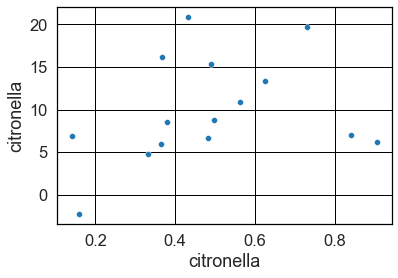

In [92]:
sns.scatterplot(
    x = ex.loc['DAN', 'citronella'],
    y = ex.loc['MBON', 'citronella']
)

In [90]:
ax = plt.figure()
type(ax)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

In [93]:
ex.T

DAN                                                    \
greek_lobe       α'1       α'2       α'3        α1        α2        α3   
citronella  0.481624  0.367692  0.904901  0.141556  0.365226  0.431450   
ethanol     0.276859  0.255270  1.117133  0.208673  0.319671  0.357895   
heptanone   0.566499  0.374212  0.581740  0.142432  0.360841  0.468953   
hexanol     0.522537  0.245707  0.706134  0.280743  0.275617  0.368824   
mch         0.404428  0.235425  0.436457  0.316079  0.225136  0.404874   
octanol     0.744930  0.627846  0.643226  0.346082  0.661575  0.842880   
peppermint  0.722583  0.447005  0.965673  0.165674  0.421672  0.561267   
vinegar     0.246394  0.230822  0.818344  0.088059  0.235337  0.172045   
yeast       0.341463  0.342419  1.015078  0.116289  0.323195  0.301197   

                                                    ...       MBON             \
greek_lobe       β'1       β'2        β1        β2  ...         α3        β'1   
citronella  0.841846  0.624329  0.379645  0.561357  ...  20.897464   6.953496   
ethanol     1.301551  0.476513  0.498212  0.701015  ...  39.737071  19.247783   
heptanone   0.902461  0.539906  0.313615  0.473446  ...  59.853255   9.596619   
hexanol     1.246798  0.783863  0.607848  0.775859  ...  57.371698   4.755605   
mch         1.301942  1.144612  1.059770  1.293335  ...  38.627667   6.039949   
octanol     1.272172  0.675346  0.740489  0.636174  ...  40.676845   8.427114   
peppermint  1.524851  0.692589  0.486610  0.513342  ...  50.154443  19.877868   
vinegar     0.919013  0.859492  0.616561  0.857987  ...  65.533156  54.377704   
yeast       1.051012  0.930360  0.496783  0.761770  ...  73.104286  53.161709   

                                                                              \
greek_lobe        β'2         β1         β2         γ1         γ2         γ3   
citronella  13.379730   8.588297  10.886406   4.771482   8.819633  19.665794   
ethanol     12.367632  18.581403  19.149789  21.128296  30.952896  25.485089   
heptanone   26.951265  33.091999  15.284229  36.411132  35.670249  47.391195   
hexanol     27.698609  30.181439  15.487117  42.177277  29.912453  42.392053   
mch         20.891894  17.944532  14.175397  27.298573  20.138735  33.707950   
octanol     22.528744  22.546595  13.899084  17.331027  22.274917  43.231465   
peppermint  19.256622  20.709696  12.324739  22.013689  33.366137  33.728509   
vinegar     19.122448  35.949324  22.979441  51.978829  57.264095  49.170600   
yeast       18.998279  24.086183  22.078778  40.541618  51.142222  44.216428   

                                 
greek_lobe         γ4        γ5  
citronella  15.380895 -2.314361  
ethanol     12.376639  3.787411  
heptanone   45.752188  3.114979  
hexanol     34.171182  0.009922  
mch         27.925874  0.867203  
octanol     41.255447 -0.627063  
peppermint  27.633551  3.140346  
vinegar     29.786554  9.060922  
yeast       23.398783  7.768698  

[9 rows x 30 columns]